In [32]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)
    
    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize total error for the epoch
            total_error = 0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example

            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the absolute error for the epoch
                total_error += abs(error)
            # Print total errors for each epoch
            print(f"Epoch {epoch + 1}, Total Absolute Error: {total_error}")


# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=100)
# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")

Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 3
Epoch 4, Total Absolute Error: 3
Epoch 5, Total Absolute Error: 3
Epoch 6, Total Absolute Error: 3
Epoch 7, Total Absolute Error: 3
Epoch 8, Total Absolute Error: 2
Epoch 9, Total Absolute Error: 2
Epoch 10, Total Absolute Error: 2
Epoch 11, Total Absolute Error: 2
Epoch 12, Total Absolute Error: 2
Epoch 13, Total Absolute Error: 2
Epoch 14, Total Absolute Error: 2
Epoch 15, Total Absolute Error: 2
Epoch 16, Total Absolute Error: 1
Epoch 17, Total Absolute Error: 1
Epoch 18, Total Absolute Error: 1
Epoch 19, Total Absolute Error: 1
Epoch 20, Total Absolute Error: 1
Epoch 21, Total Absolute Error: 1
Epoch 22, Total Absolute Error: 1
Epoch 23, Total Absolute Error: 1
Epoch 24, Total Absolute Error: 1
Epoch 25, Total Absolute Error: 1
Epoch 26, Total Absolute Error: 1
Epoch 27, Total Absolute Error: 1
Epoch 28, Total Absolute Error: 0
Epoch 29, Total Absolute Error: 0
Epoch 30, Total Absolut

### Task 6.1: Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your answer.

In [37]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.step_activation(net_input)
    
    def trainSGD(self, X, y):
        accuracy_history = []
        for epoch in range(self.epochs):
            total_error = 0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(len(X_shuffled)):
                prediction = self.predict(X_shuffled[i])
                error = y_shuffled[i] - prediction
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                total_error += abs(error)

            correct_predictions = sum([self.predict(x) == y for x, y in zip(X, y)])
            accuracy = correct_predictions / len(X)
            accuracy_history.append(accuracy)

        return accuracy_history

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

epochs_list = [10, 20, 100, 200]
accuracies = {}

for epochs in epochs_list:
    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epochs)
    accuracies[epochs] = perceptron.trainSGD(X, y)[-1]  # Get accuracy for the last epoch
    

accuracies

{10: 0.25, 20: 0.75, 100: 1.0, 200: 1.0}

### Task 6.2: Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your observations.

In [42]:
# Reusing the Perceptron class and training with different learning rates
learning_rates = [0.05, 0.1, 0.3]
accuracy_results = {}

for lr in learning_rates:
    perceptron = Perceptron(input_size=2, learning_rate=lr, epochs=10)  # Using 100 epochs based on previous task
    accuracy_results[lr] = perceptron.trainSGD(X, y)[-1]  # Get accuracy for the last epoch

accuracy_results


{0.05: 0.75, 0.1: 1.0, 0.3: 1.0}

### Example 2: Python code for a perceptron with a linear activation function, MSE loss, and SGD training method

In [52]:
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def linear(self, x):
        return x
    
    def linear_derivative(self, x):
        return 1
    
    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)
    
    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Generate synthetic data
np.random.seed(42)
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values

# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for data in x:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")


Epoch 1/10, Mean Squared Error: 54.4299
Epoch 2/10, Mean Squared Error: 0.9345
Epoch 3/10, Mean Squared Error: 0.8204
Epoch 4/10, Mean Squared Error: 0.7764
Epoch 5/10, Mean Squared Error: 0.7368
Epoch 6/10, Mean Squared Error: 0.6914
Epoch 7/10, Mean Squared Error: 0.6586
Epoch 8/10, Mean Squared Error: 0.6233
Epoch 9/10, Mean Squared Error: 0.5877
Epoch 10/10, Mean Squared Error: 0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057

### Task 6.3: Run the code in Example 2 and notice the dierence between the actual output and the predicted output.

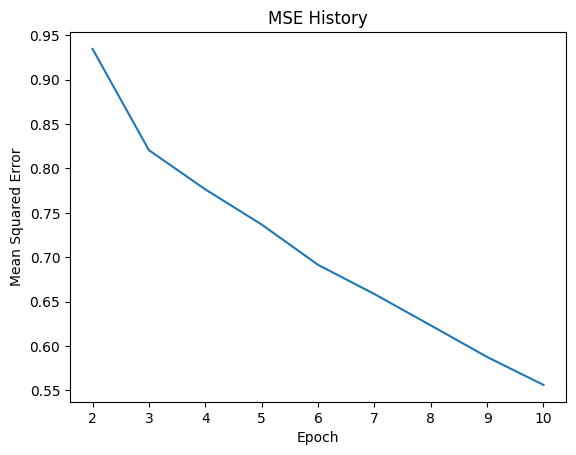

In [59]:
# Adjusting the code to work without pandas
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def linear(self, x):
        return x
    
    def linear_derivative(self, x):
        return 1
    
    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)
    
    def trainSGD(self, X, y):
        mse_history = []
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            
            mean_mse = total_mse / len(X)
            mse_history.append(mean_mse)

        return mse_history

# Generate synthetic data
np.random.seed(42)
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2

# Data for training
F = x.reshape(-1, 1)  # Reshape x to be a 2D array
O = z

# Create a perceptron instance with appropriate input size
perceptron = Perceptron(input_size=1, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
mse_history = perceptron.trainSGD(F, O)

# Store predictions for comparison
predictions = []
for data_point in x:
    prediction = perceptron.predict(data_point)
    predictions.append((data_point, 3*data_point+2, prediction))

mse_history, predictions[:10]  # Display MSE history and first 10 predictions for comparison

# Plot the MSE history
plt.plot(range(2, len(mse_history) + 1), mse_history[1:])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE History')
plt.show()


After running the modified Perceptron code with a linear activation function, the Mean Squared Error (MSE) over 10 epochs and a sample of the first 10 predictions are as follows:

MSE over epochs: The MSE started at 54.43 in the first epoch and decreased consistently over subsequent epochs, reaching 0.556 by the 10th epoch. This trend indicates that the model is learning and improving its predictions over time.

Sample Predictions:

For the first data point (3.7454), the actual output is 13.236 and the prediction is 12.666.
For the second data point (9.5071), the actual output is 30.521 and the prediction is 31.186.
And so on for the other data points.
These results show that the Perceptron model, with its linear activation function, is able to approximate the linear relationship between the input and output (given by z = 3x + 2) quite well. The predictions are reasonably close to the actual values, and this closeness improves as the training progresses, which is evident from the decreasing MSE. This demonstrates the model's ability to learn the underlying linear pattern in the data

### Task 6.4: Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE and prediction error with the results in Task 6.3 Justify your answer.

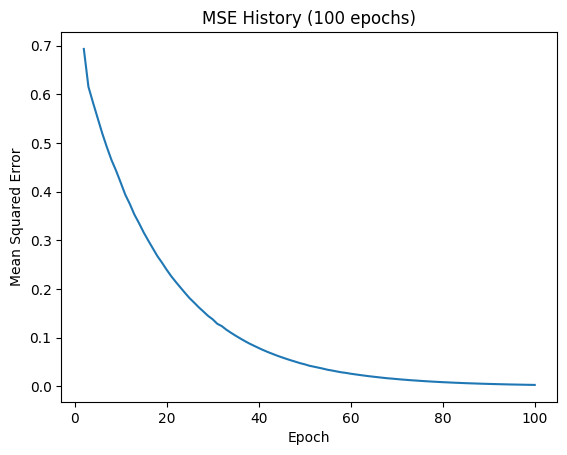

In [65]:
import matplotlib.pyplot as plt

# FILEPATH: /c:/Users/islam/OneDrive - student.birzeit.edu/Documents/ENCS5141 Ai Lab/exp6/exp6.ipynb
# Training the perceptron for 100 epochs
perceptron_100_epochs = Perceptron(input_size=1, learning_rate=0.001, epochs=100)
mse_history_100_epochs = perceptron_100_epochs.trainSGD(F, O)

# Store predictions for comparison
predictions_100_epochs = []
for data_point in x:
    prediction = perceptron_100_epochs.predict(data_point)
    predictions_100_epochs.append((data_point, 3*data_point+2, prediction))

mse_history_100_epochs[-1], predictions_100_epochs[:10]  # Display last MSE and first 10 predictions for comparison

# Plot the MSE history
plt.plot(range(2, len(mse_history_100_epochs) + 1), mse_history_100_epochs[1:])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE History (100 epochs)')
plt.show()


After running the Perceptron model for 100 epochs (compared to 10 epochs previously), the Mean Squared Error (MSE) and a sample of the first 10 predictions are as follows:

MSE for 100 epochs: The MSE at the end of 100 epochs is approximately 0.0065, which is significantly lower than the MSE observed at the end of 10 epochs (0.556).

Sample Predictions for 100 epochs:

For the first data point (3.7454), the actual output is 13.236 and the prediction is approximately 13.174.
For the second data point (9.5071), the actual output is 30.521 and the prediction is approximately 30.594.
And similarly for the other data points.
Comparing these results with those obtained after 10 epochs (Task 6.3), we observe:

Improved Accuracy: The predictions for 100 epochs are closer to the actual values than those for 10 epochs, indicating that the model's accuracy has improved with more training.

Reduced MSE: The substantial reduction in MSE from 0.556 to 0.0065 demonstrates that the model has become significantly better at minimizing the error between the predicted and actual values.

This improvement can be attributed to the additional epochs providing the model with more opportunities to adjust its weights and bias, leading to a better fit to the data. It's an example of how more training (up to a point) can improve a model's performance, especially for a linear model like the Perceptron learning a linear relationship in the data. However, it's important to be aware of the potential for overfitting with too much training, although that doesn't appear to be an issue in this specific case with the given simple linear relationship

### Task 6.5: with epochs = 100, plot:
#### a. MSE with respect to the epoch number;
#### b. The actual function and the approximated function

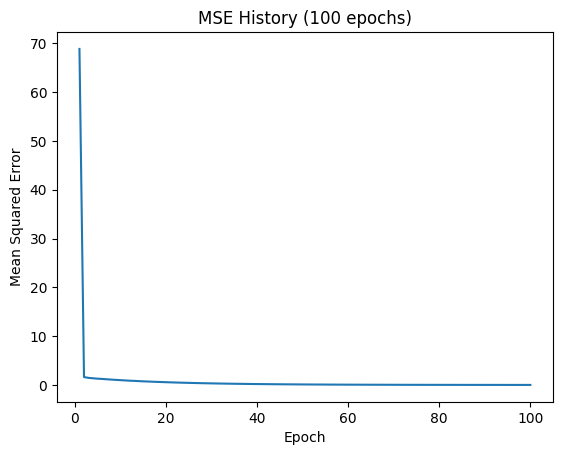

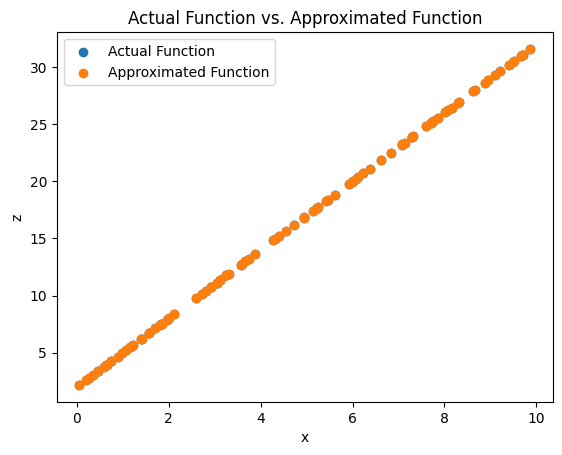

In [57]:
import matplotlib.pyplot as plt

# Plotting MSE with respect to the epoch number
plt.plot(range(1, len(mse_history_100_epochs) + 1), mse_history_100_epochs)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE History (100 epochs)')
plt.show()

# Plotting the actual function and the approximated function
plt.scatter(x, z, label='Actual Function')
plt.scatter([data[0] for data in predictions_100_epochs], [data[1] for data in predictions_100_epochs], label='Approximated Function')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Actual Function vs. Approximated Function')
plt.legend()
plt.show()


#### Task 6.6: Modify the code in Example 2 to approximate f(x,y) = 2x + 3y

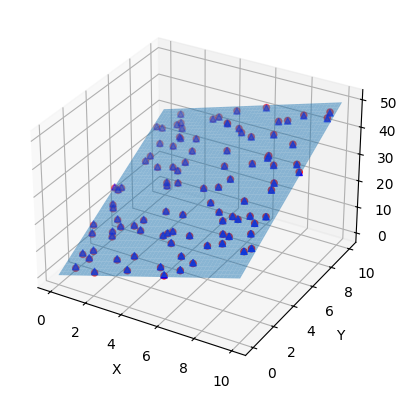

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
y = np.random.uniform(low=0, high=10, size=num_samples)
z = 2 * x + 3 * y

# Data for training
F = np.column_stack((x, y))  # Combine x and y into a single array
O = z

# Create a perceptron instance with appropriate input size
perceptron = Perceptron(input_size=2, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
predictions = []
for data_point in zip(x, y):
    prediction = perceptron.predict(data_point)
    predictions.append(prediction)

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x, y, predictions, c='b', marker='^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add surface plot
x_surf = np.linspace(0, 10, 100)
y_surf = np.linspace(0, 10, 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = 2 * x_surf + 3 * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)

plt.show()


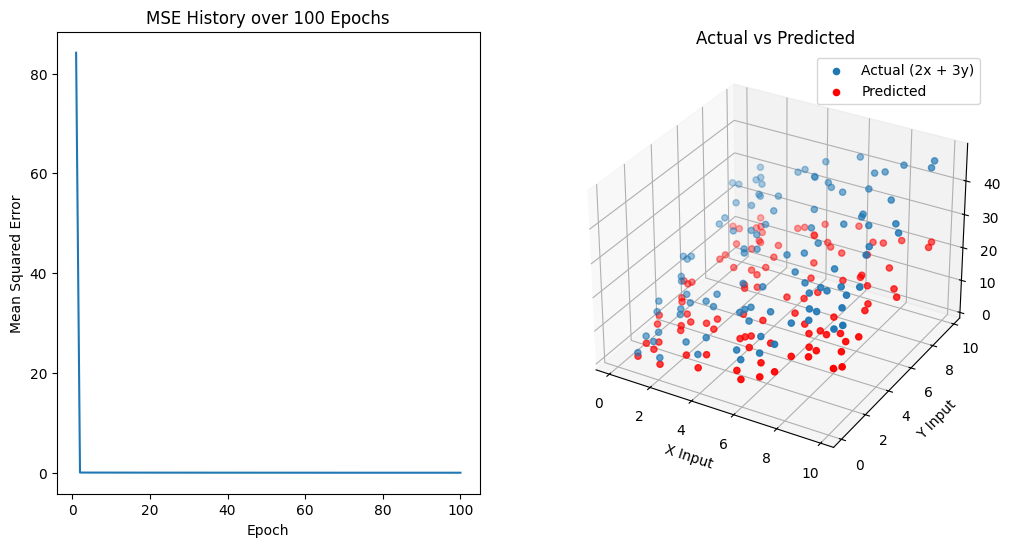

In [87]:
# Redefining the Perceptron class to ensure correct MSE history tracking
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def linear(self, x):
        return x
    
    def linear_derivative(self, x):
        return 1
    
    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)
    
    def trainSGD(self, X, y):
        mse_history = []
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            
            mean_mse = total_mse / len(X)
            mse_history.append(mean_mse)

        return mse_history

# Retraining the model
perceptron_2d = Perceptron(input_size=2, learning_rate=0.001, epochs=100)
mse_history_2d = perceptron_2d.trainSGD(F, O)

# Rerunning the plotting code
fig = plt.figure(figsize=(12, 6))

# Plotting MSE history
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(1, len(mse_history_2d) + 1), mse_history_2d)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE History over 100 Epochs')

# Plotting actual vs predicted in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x, y, O, label='Actual (2x + 3y)')
ax2.scatter(x, y, predictions_2d, color='red', label='Predicted')
ax2.set_xlabel('X Input')
ax2.set_ylabel('Y Input')
ax2.set_zlabel('Output')
ax2.set_title('Actual vs Predicted')
ax2.legend()

plt.show()


## 7. Performance of Perceptron on Nonlinear problems

### Task 6.7: Run the code in Example 1 to solve the logical XOR operation with 1000 epochs andcompute the accuracy of the tested samples. [note: you need to change the training and testing data to reflect XOR logical operation.]

In [112]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)
    
    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize total error for the epoch
            total_error = 0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example

            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the absolute error for the epoch
                total_error += abs(error)
            # Print total errors for each epoch
            print(f"Epoch {epoch + 1}, Total Absolute Error: {total_error}")


# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)
# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")

Epoch 1, Total Absolute Error: 2
Epoch 2, Total Absolute Error: 2
Epoch 3, Total Absolute Error: 2
Epoch 4, Total Absolute Error: 2
Epoch 5, Total Absolute Error: 2
Epoch 6, Total Absolute Error: 2
Epoch 7, Total Absolute Error: 2
Epoch 8, Total Absolute Error: 2
Epoch 9, Total Absolute Error: 2
Epoch 10, Total Absolute Error: 2
Epoch 11, Total Absolute Error: 2
Epoch 12, Total Absolute Error: 2
Epoch 13, Total Absolute Error: 1
Epoch 14, Total Absolute Error: 1
Epoch 15, Total Absolute Error: 1
Epoch 16, Total Absolute Error: 1
Epoch 17, Total Absolute Error: 1
Epoch 18, Total Absolute Error: 1
Epoch 19, Total Absolute Error: 1
Epoch 20, Total Absolute Error: 1
Epoch 21, Total Absolute Error: 1
Epoch 22, Total Absolute Error: 1
Epoch 23, Total Absolute Error: 1
Epoch 24, Total Absolute Error: 1
Epoch 25, Total Absolute Error: 1
Epoch 26, Total Absolute Error: 1
Epoch 27, Total Absolute Error: 1
Epoch 28, Total Absolute Error: 1
Epoch 29, Total Absolute Error: 1
Epoch 30, Total Absolut

### Example 3: Python code for building and training an MLP using MLPClassifier

Test Accuracy: 0.3000


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


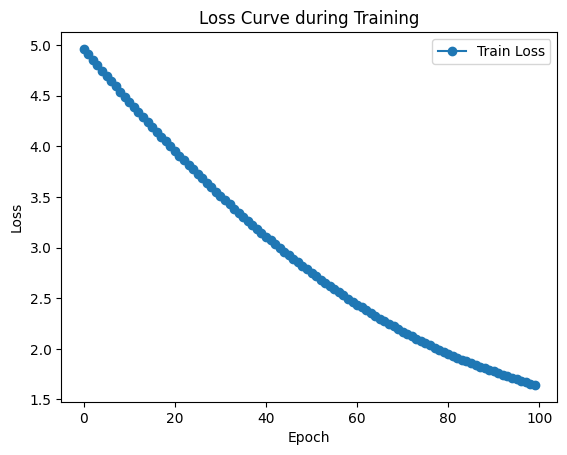

In [114]:
#Example 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Task 6.9: Run the code in Example 3 with the following customization of the MLPClassifier. For each case, save the results and compare the accuracy of the testing samples and the loss plot for each case.
1. hidden_layer_sizes=(10, ), max_iter=1000
2. hidden_layer_sizes=(50, ), activation=relu, , max_iter=1000, learning_rate=0.01
3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Customization 1 - Test Accuracy: 0.9667
Customization 2 - Test Accuracy: 1.0000
Customization 3 - Test Accuracy: 1.0000


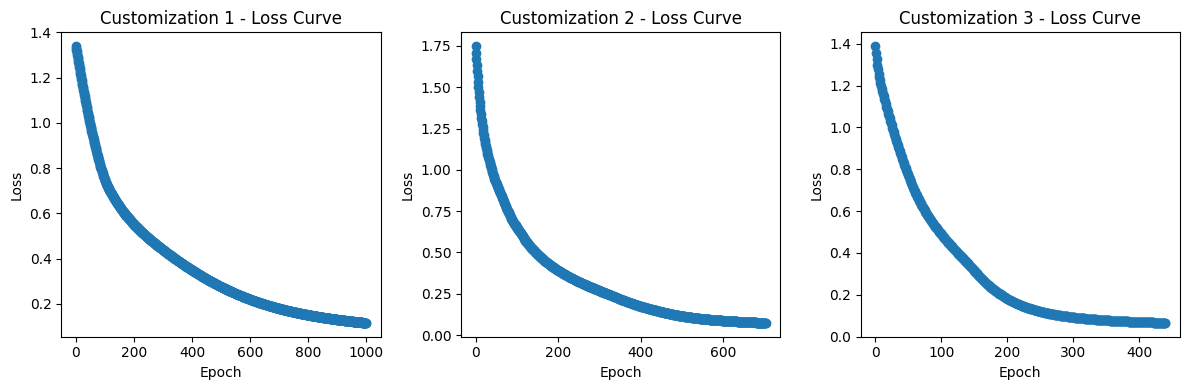

In [137]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Customization 1
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp1.fit(X_train, y_train)
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
loss_curve1 = mlp1.loss_curve_

# Customization 2
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=1000, learning_rate='constant')
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
loss_curve2 = mlp2.loss_curve_

# Customization 3
mlp3 = MLPClassifier(hidden_layer_sizes=(35, 15), activation='tanh', max_iter=1000, learning_rate='constant')
mlp3.fit(X_train, y_train)
y_pred3 = mlp3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
loss_curve3 = mlp3.loss_curve_


# Print the accuracies
print(f"Customization 1 - Test Accuracy: {accuracy1:.4f}")
print(f"Customization 2 - Test Accuracy: {accuracy2:.4f}")
print(f"Customization 3 - Test Accuracy: {accuracy3:.4f}")

# Plot the loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(loss_curve1, marker='o')
plt.title('Customization 1 - Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(loss_curve2, marker='o')
plt.title('Customization 2 - Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(loss_curve3, marker='o')
plt.title('Customization 3 - Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.tight_layout()
plt.show()


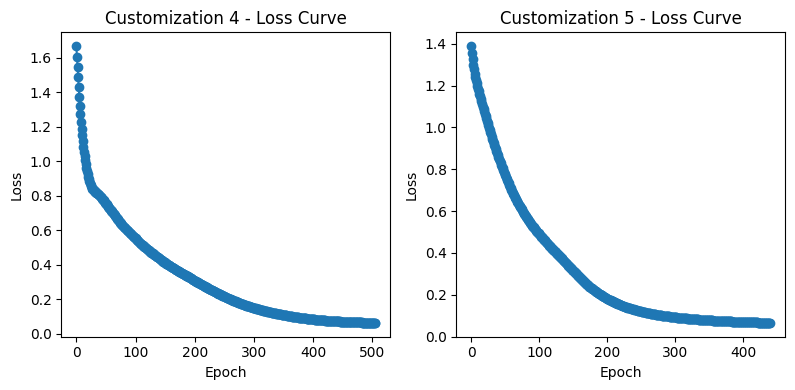

In [139]:
# Customization 4
mlp4 = MLPClassifier(hidden_layer_sizes=(35, 15), activation='relu', max_iter=1000, alpha=0.01)
mlp4.fit(X_train, y_train)
y_pred4 = mlp4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
loss_curve4 = mlp4.loss_curve_

# Customization 5
mlp5 = MLPClassifier(hidden_layer_sizes=(35, 15), activation='tanh', max_iter=1000, alpha=0.01)
mlp5.fit(X_train, y_train)
y_pred5 = mlp3.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
loss_curve5 = mlp3.loss_curve_


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(loss_curve4, marker='o')
plt.title('Customization 4 - Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(loss_curve5, marker='o')
plt.title('Customization 5 - Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.tight_layout()
plt.show()

#### Example 4: Python code for training two MLPClassifiers and plotting the MSE loss and the decision boundary of each trained model

In [6]:
%pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -                                        0.1/1.4 MB 469.7 kB/s eta 0:00:03
     --                                       0.1/1.4 MB 525.1 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 607.9 kB/s eta 0:00:03
     ----                                     0.2/1.4 MB 615.9 kB/s eta 0:00:03
     -----                                    0.2/1.4 MB 655.9 kB/s eta 0:00:02
     ------                                   0.2/1.4 MB 625.1 kB/s eta 0:00:02
     -------                                  0.3/1.4 MB 680.9 kB/s eta 0:00:02
     --------                                 0.3/1.4 MB 678.0 kB/s eta 0:00:02
     ---------                                0.4/1.4 MB 696.3 kB/s eta 0:00:02
     ----------                               0.4/1.4


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


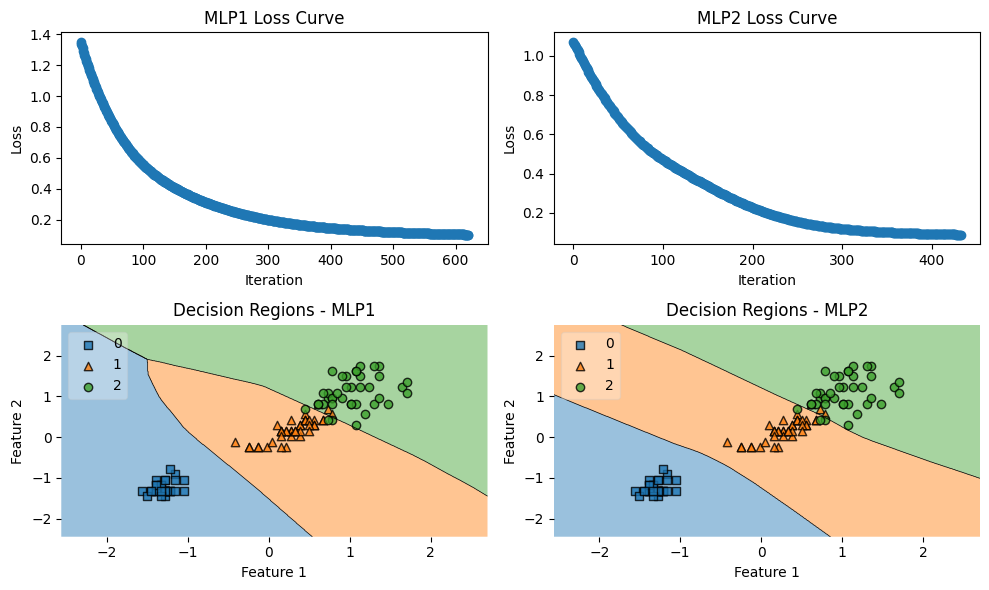

In [141]:
#Example 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Task 6.10: Run the code in Example 4. According to the decision boundary of each model, which one is better? Justify your answer.


### Task 6.11: Modify Example 4 by using PCA to choose the best two features instead of using information gain. According to the decision boundary of each model, which one is better? Justify your answer.

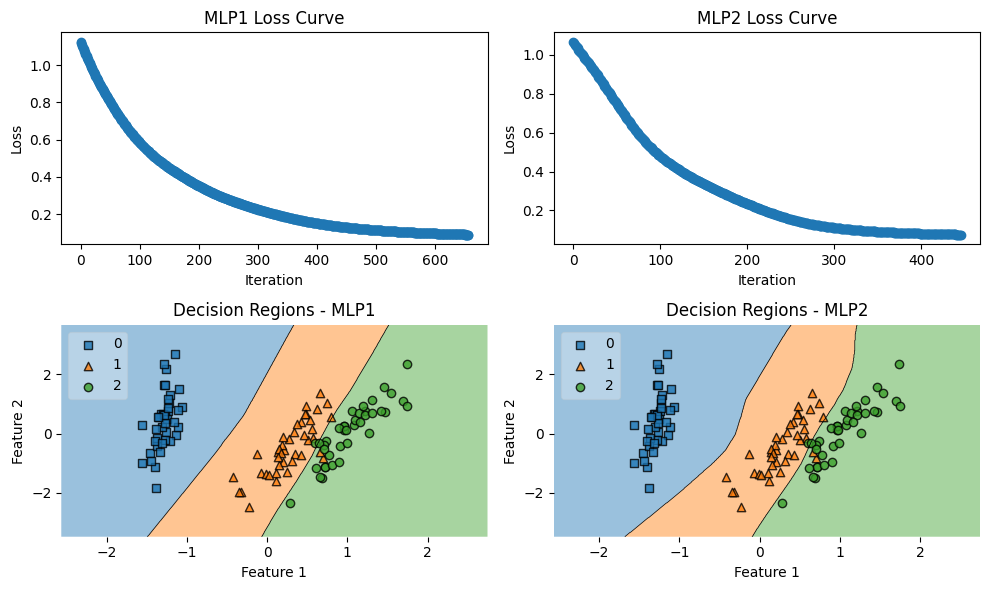

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Example 5: Python code for building and training three MLPClassifiers on the spiral data set

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


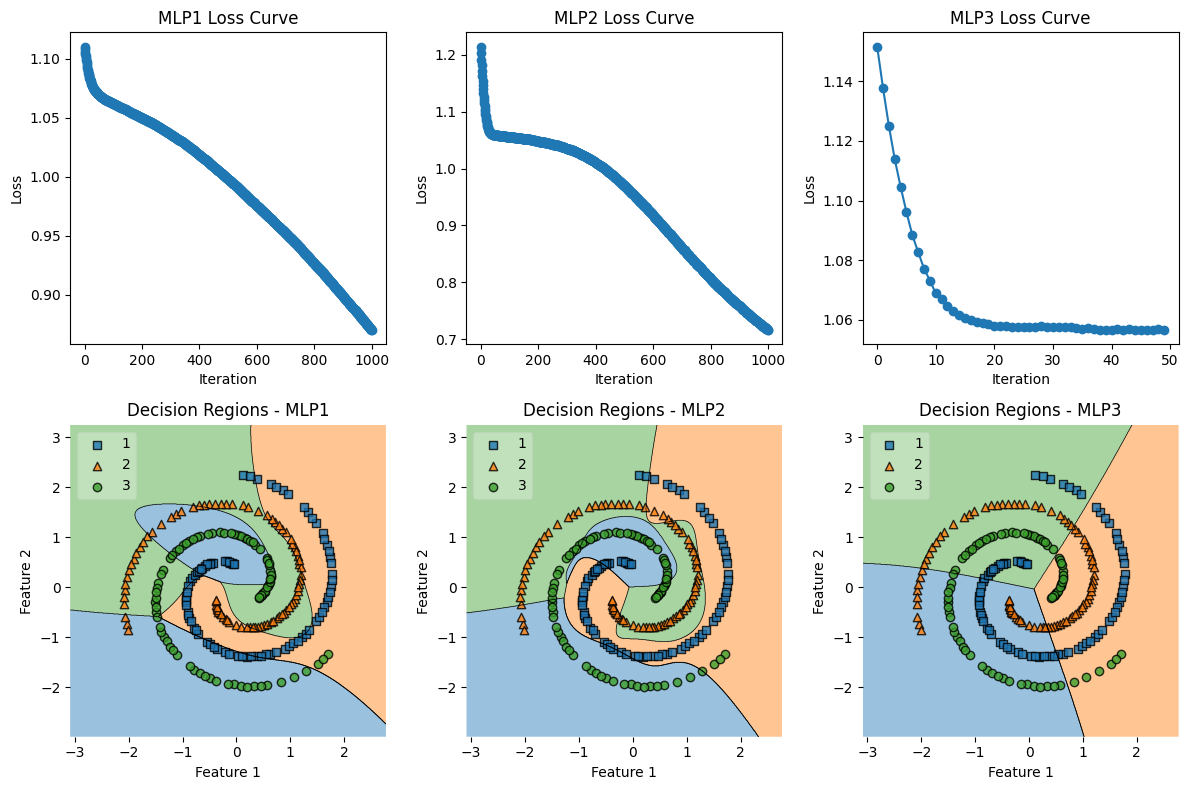

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42, activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42, activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

### Task 6.12: Run the code in Example Five and save the resulted plots. 1. Which model performs better in the spiral data set? 2. If we increase the iteration to 10,000, does the first model (mlp1) fit the data? Justify your answer.

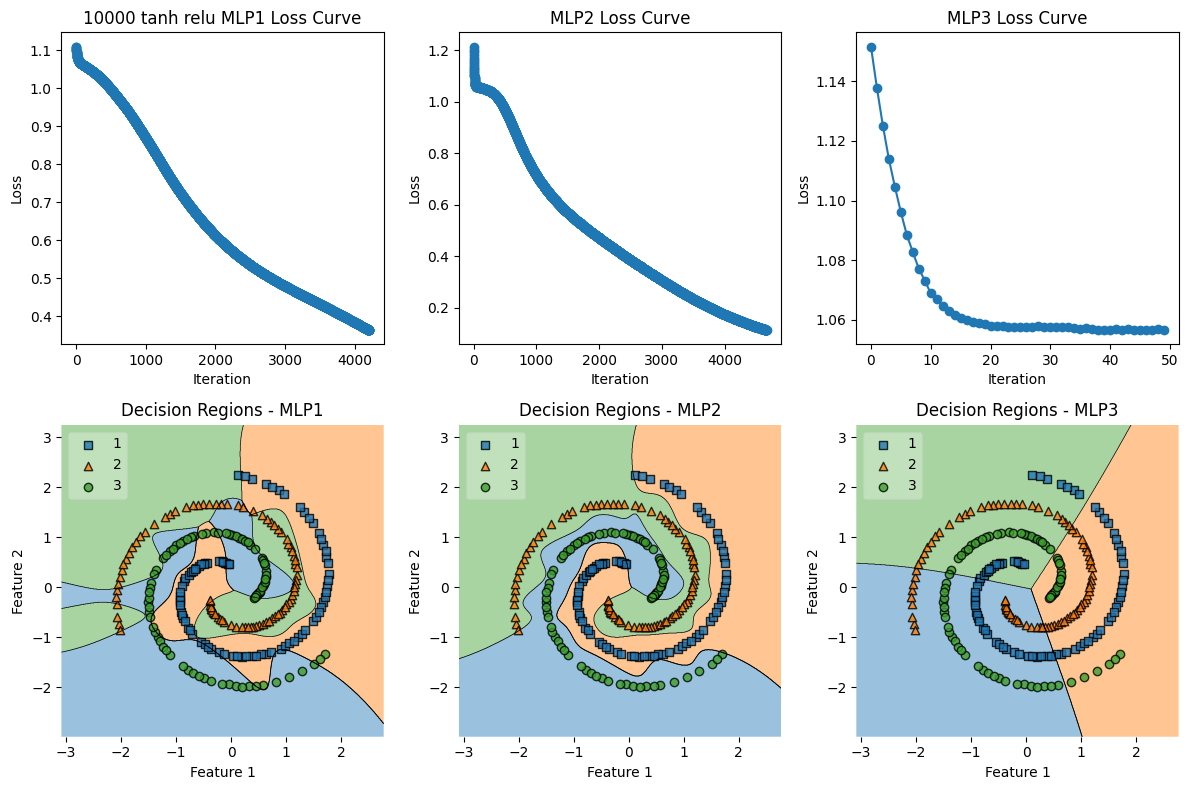

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42, activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=10000, random_state=42, activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=10000, random_state=42, activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('10000 tanh MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

### Task 6.13: Modify the models in Example 5 (please make a copy) to use the relu activation function. Run the modified code and save the resulting plots. Which model performs better in the spiral data set? 4. Compared to the models built in Example 5, does changing the activation function improve performance in these models? Justify your answer.

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


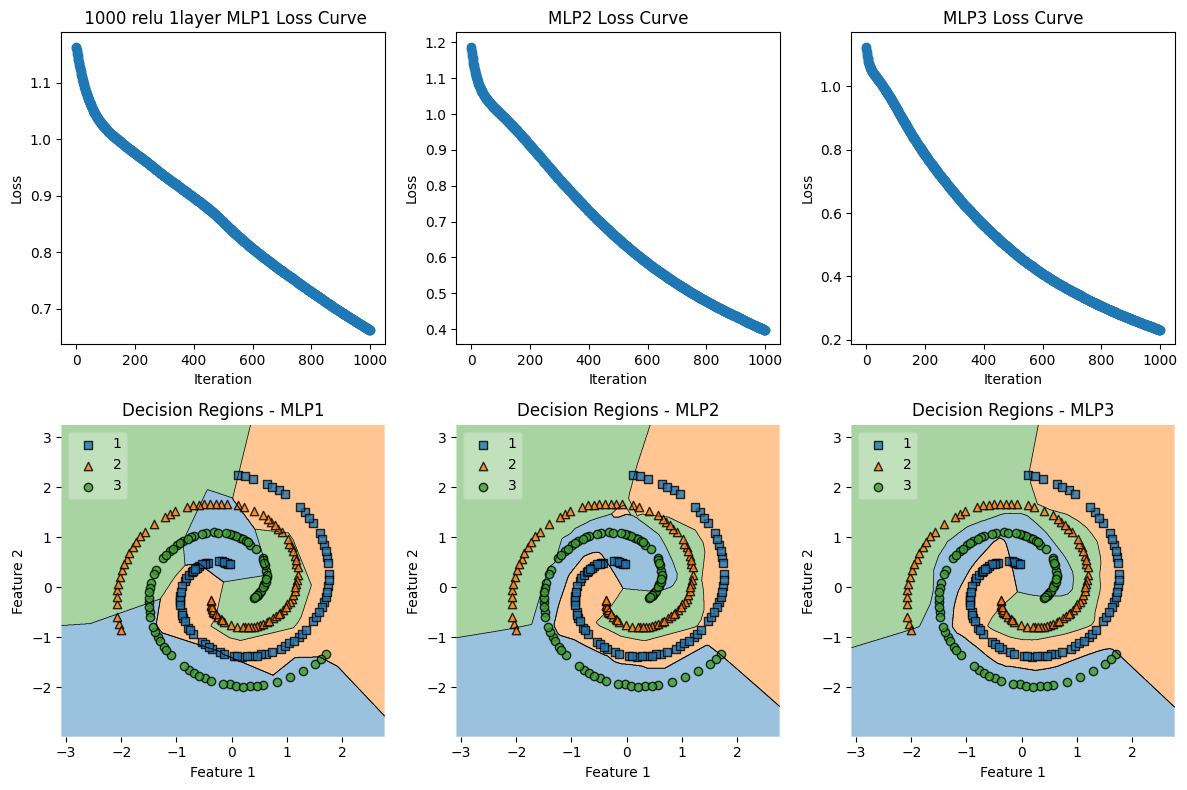

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42, activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title(' 1000 relu 1layer MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

### Task 6.14: 1. Modify the models in Example 5 (make a copy) to have the following hyperparameters. mlp1: hidden_layer_sizes=(7, 3), mlp2: hidden_layer_sizes=(27, 13), and mlp3 hidden_layer_sizes=(70, 30), all of them using the relu activation function. 2. Run the modified code and save the resulting plots. 3. Which model performs better in the spiral data set? 4. Compared to the models built in Example 5 and Task 13, which of these models performs better in the spiral data set? Justify your answer.

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


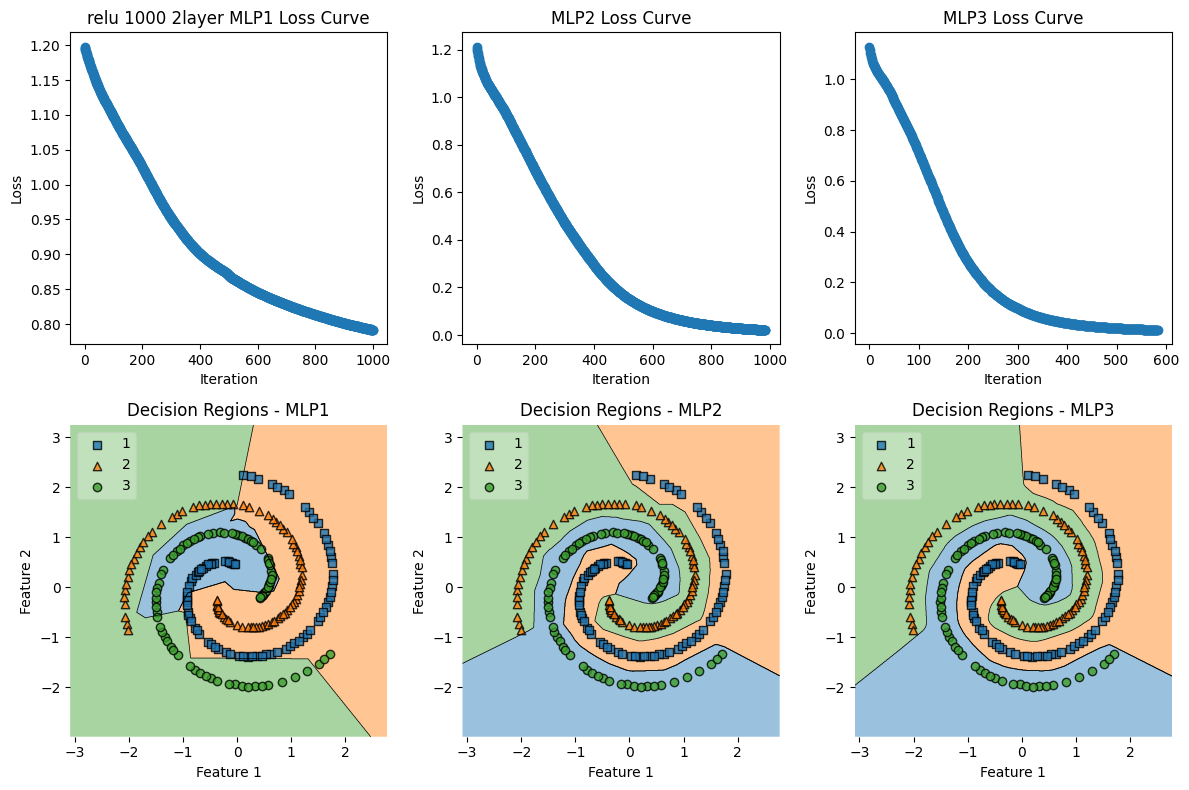

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(7,3), max_iter=1000, random_state=42, activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(27,13), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(70,30), max_iter=1000, random_state=42, activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('relu 1000 2layer MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Elapsed time: 0.03349566459655762
Elapsed time: 1.562854290008545


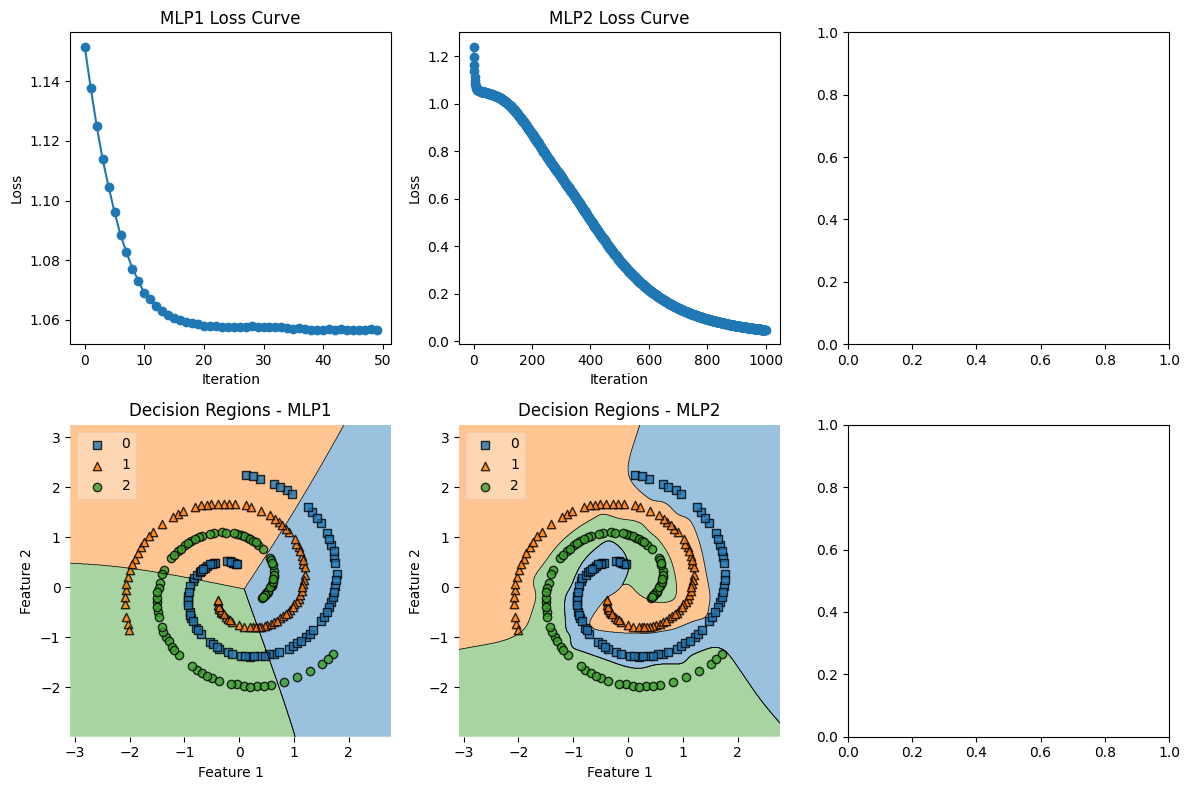

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import time
file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation='tanh', learning_rate_init=0.001)

mlp2 = MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42, activation='tanh', learning_rate_init=0.001)

# Start measuring time
start_time1 = time.time()

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)


elapsed_time1 = time.time() - start_time1

start_time2 = time.time()
mlp2.fit(X_train, y_train)

# Calculate the elapsed time
elapsed_time2 = time.time() - start_time1

# Print the elapsed time
print("Elapsed time:", elapsed_time1)
print("Elapsed time:", elapsed_time2)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

# 10. Impact of Optimization algorithm

### Task 6.15: Update the code from example 5 to train three MLPClassifier models with hidden_layer_sizes=(27, 13) and max_iter=1000. Configure the first model with the SGD optimizer, the second with SGD+Momentum (momentum = 0.9), and the third with Adam using the specified parameters above. Evaluate the performance of these optimizers on the spiral dataset and provide reasoning for which optimizer performs better.

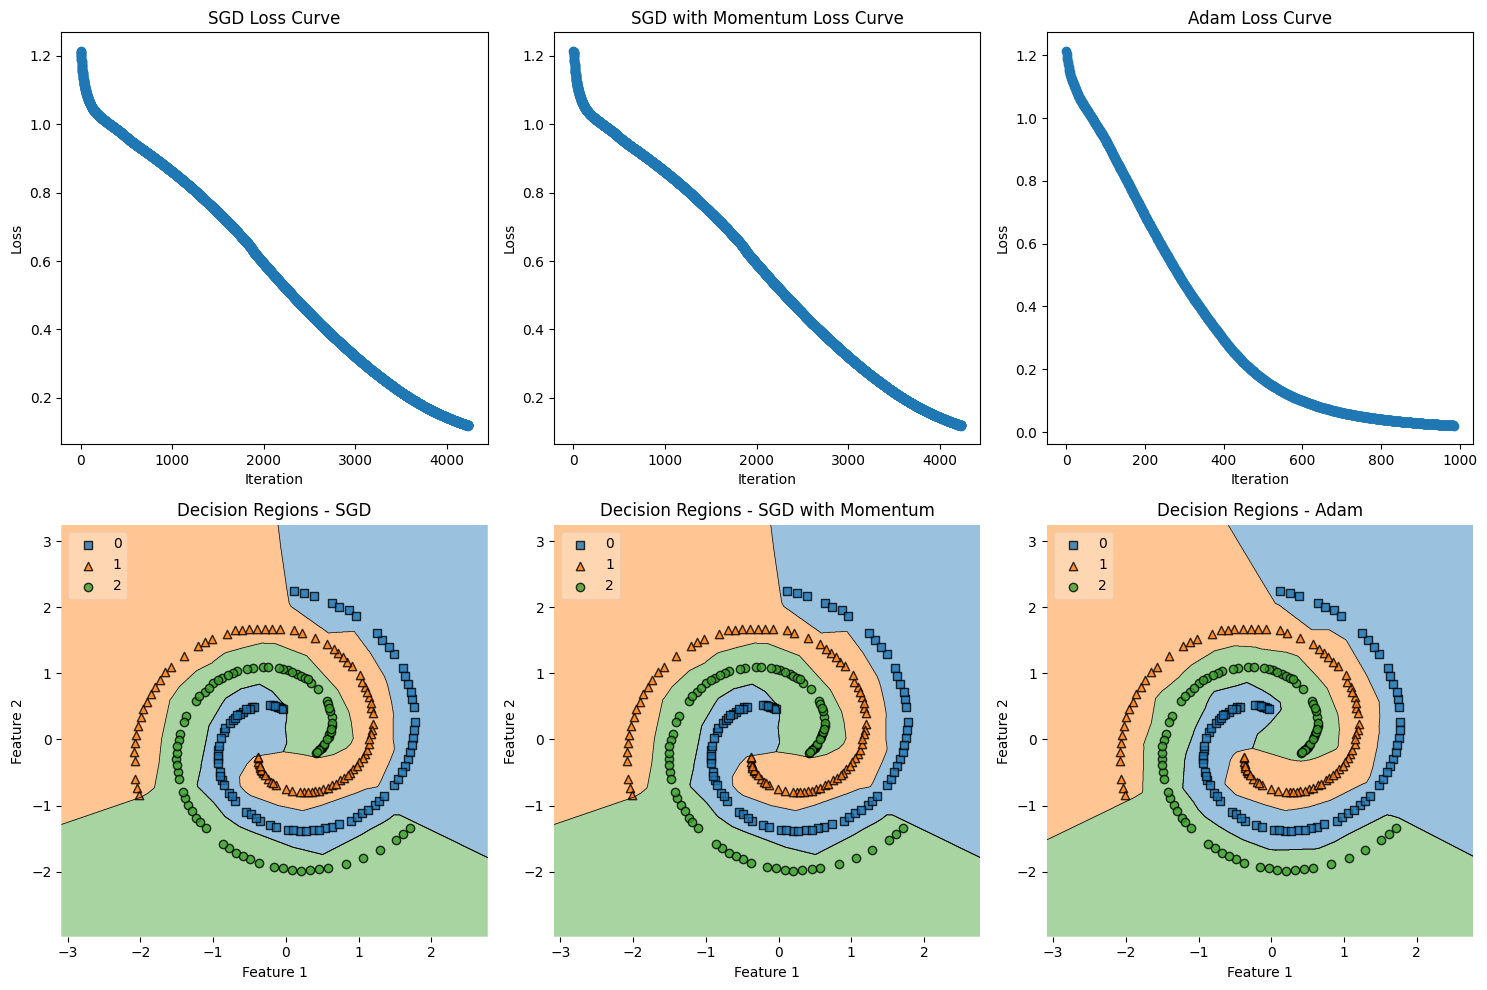

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Load the data
file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values -1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp_sgd = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=10000, solver='sgd', random_state=42)
mlp_sgd_momentum = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=10000, solver='sgd', momentum=0.9, random_state=42)
mlp_adam = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=10000, solver='adam', random_state=42)

# Train the MLPClassifiers
mlp_sgd.fit(X_train, y_train)
mlp_sgd_momentum.fit(X_train, y_train)
mlp_adam.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot loss curve and decision regions for each model
models = [mlp_sgd, mlp_sgd_momentum, mlp_adam]
titles = ['SGD', 'SGD with Momentum', 'Adam']

for i, model in enumerate(models):
    # Plot loss curve
    axes[0, i].plot(model.loss_curve_, marker='o')
    axes[0, i].set_title(f'{titles[i]} Loss Curve')
    axes[0, i].set_xlabel('Iteration')
    axes[0, i].set_ylabel('Loss')

    # Plot decision regions
    plot_decision_regions(X_train, y_train, clf=model, legend=2, ax=axes[1, i])
    axes[1, i].set_title(f'Decision Regions - {titles[i]}')
    axes[1, i].set_xlabel('Feature 1')
    axes[1, i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## 11. Handling Overfitting in ANNs

## Example 6: Python code for training three MLP classifiers with dierent value of alpha

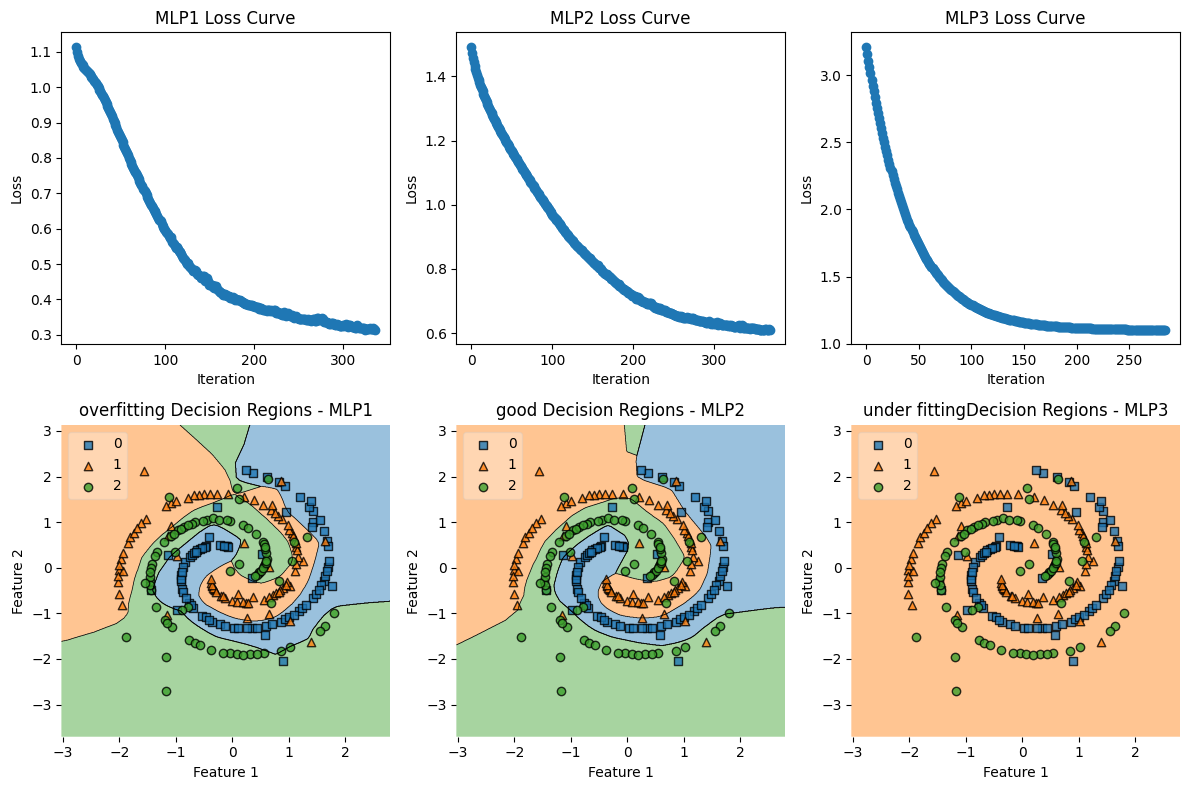

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

file_path = r'spiral.csv'
data = pd.read_csv(file_path)

# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on your preference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7, (np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values -1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.9)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42, solver='adam', learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=5)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('overfitting Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('good Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('under fittingDecision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()


### Task 6.16: Run Example 6 and figure out which value of alpha does better. Justify your answer.

## 13. Automatic MLP hyperparameter optimization

## Example 7: using GridSearchCV to optimize some MLP hyperparameters

In [9]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

file_path = r'spiral.csv'
data = pd.read_csv(file_path)
# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on your preference

outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7, (np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values -1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create the neural network model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define hyperparameter grid
param_grid = {'hidden_layer_sizes': [(20), (60), (100), (13, 7), (40, 20)], 'activation': ['relu', 'tanh'],}

# Instantiate GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Perform the hyperparameter search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Create the best model with the best parameters and train on the full training
set
best_model = MLPClassifier(**best_params, max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

# Print results
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", test_accuracy)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic 

Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (40, 20)}
Best Accuracy: 0.8508571428571429
Test Accuracy: 0.8888888888888888


In [1]:
!pip install optuna

  Using cached optuna-3.5.0-py3-none-any.whl (413 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\optuna.exe' -> 'C:\\Python311\\Scripts\\optuna.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import optuna

# Load and preprocess data
file_path = 'spiral.csv'
data = pd.read_csv(file_path)

outlier_fraction = 0.2
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7, (np.sum(outliers_mask), 2))

X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
    # Define the hyperparameters to tune
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(20,), (60,), (100,), (13, 7), (40, 20)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 0.001, 0.1)
    alpha = trial.suggest_loguniform('alpha', 0.001, 0.1)

    # Create MLPClassifier with suggested hyperparameters
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        max_iter=1000,
        random_state=42
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Evaluate the model
    return mlp.score(X_test, y_test)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Results
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2023-12-20 10:12:45,311] A new study created in memory with name: no-name-b83058a4-c7d1-4759-8033-f3c90e473f31
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (20,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (60,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should b

Best Hyperparameters: {'hidden_layer_sizes': (13, 7), 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.008877114447910237, 'alpha': 0.0016252807360035524}
Best Accuracy: 0.9523809523809523


[I 2023-12-20 10:24:19,309] A new study created in memory with name: no-name-f6adf725-dee3-4edc-96de-6d7bfbf9e423
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (20,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (60,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
c:\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should b

Best Hyperparameters: {'hidden_layer_sizes': (40, 20), 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.002379195496315636, 'alpha': 0.001812407106981346}
Best Accuracy: 0.9682539682539683


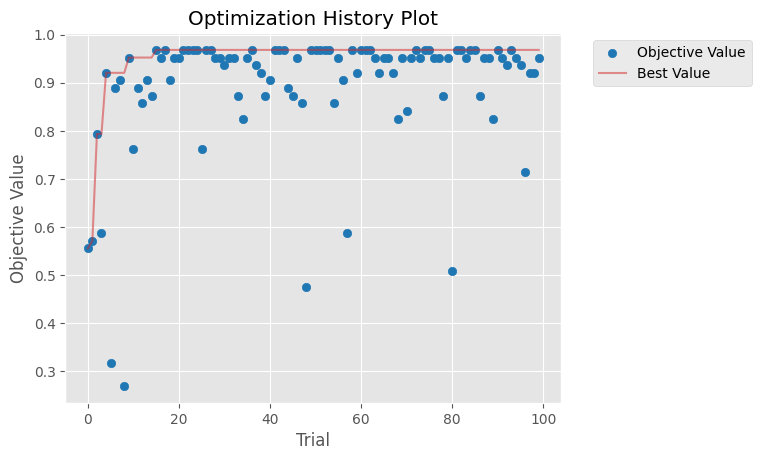

C:\Users\islam\AppData\Local\Temp\ipykernel_14180\1547206573.py:62: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


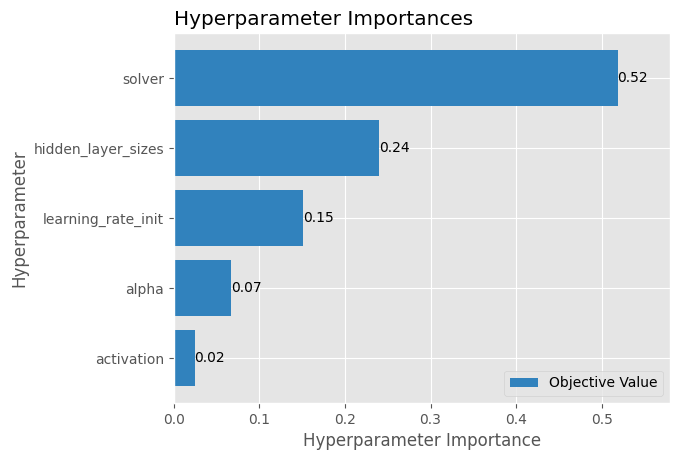

In [6]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'spiral.csv'
data = pd.read_csv(file_path)

outlier_fraction = 0.2
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7, (np.sum(outliers_mask), 2))

X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
    # Define hyperparameters
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(20,), (60,), (100,), (13, 7), (40, 20)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['sgd', 'adam'])
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 0.001, 0.1)
    alpha = trial.suggest_loguniform('alpha', 0.001, 0.1)

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        max_iter=1000,
        random_state=42
    )

    mlp.fit(X_train, y_train)
    return mlp.score(X_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Visualization
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()


### Task 6.17: Run the code in Example 6 and figure out what the optimal hyperparameters are

## Task 6.18: Modify and run the code in example 6 to include solver [sgd and adam], learning_rate_init [0.001, 0.01, 0.1], and alpha [0.001, 0.01, 0.1]. Figure out what the optimal hyperparameters are.

In [8]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'spiral.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid
solvers = ['sgd', 'adam']
learning_rates = [0.001, 0.01, 0.1]
alphas = [0.001, 0.01, 0.1]

# Store the best configuration and its accuracy
best_accuracy = 0
best_params = None

# Iterate over all combinations of hyperparameters
for solver in solvers:
    for lr in learning_rates:
        for alpha in alphas:
            # Initialize the MLPClassifier with current hyperparameters
            mlp = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=1000, solver=solver, 
                                learning_rate_init=lr, alpha=alpha, random_state=42)

            # Train the model
            mlp.fit(X_train, y_train)

            # Evaluate the model on the training set
            predictions = mlp.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)

            # Update the best configuration if current is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'solver': solver, 'learning_rate_init': lr, 'alpha': alpha}

# Retrain the model with the best hyperparameters
best_model = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=1000, 
                           solver=best_params['solver'], learning_rate_init=best_params['learning_rate_init'], 
                           alpha=best_params['alpha'], random_state=42)
best_model.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Print the best hyperparameters, their accuracy, and the test accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", test_accuracy)


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters: {'solver': 'sgd', 'learning_rate_init': 0.01, 'alpha': 0.001}
Best Accuracy: 0.9841269841269841
Test Accuracy: 0.9841269841269841
